# TensorFlow决策森林

TensorFlow决策森林（TF-DF）是一个用于训练、评估、解释和推理决策森林模型的库。
决策森林（DF）是一类用于监督分类、回归和排序的机器学习算法。顾名思义，它使用决策树作为构建块。如今，两种最流行的DF训练算法是随机森林和梯度增强决策树。


我们进行的具体操作步骤如下：
- 

## 1. 设置

- 首先，让我们确保这个笔记本在Python2和Python3中都能正常工作，导入一些常用模块：

In [1]:
!pip install tensorflow_decision_forests -q
!pip install wurlitzer -q

In [2]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

import graphviz
# 设置

# 设置
warnings.simplefilter('ignore')


- numpy: 数值计算库，常用于数组和矩阵操作。
- pandas: 数据处理和分析库，提供了数据结构和数据分析工具。
- matplotlib.pyplot: 数据可视化库，用于绘制图表。
- warnings: 用于控制警告信息的显示。
- sklearn.ensemble: 包含集成方法，如随机森林 (RandomForestClassifier) 和梯度提升树 (GradientBoostingClassifier)。
- sklearn.tree: 包含决策树 (DecisionTreeClassifier) 和其他树相关的工具，如 export_text。
- sklearn.preprocessing: 数据预处理模块，这里用到的是标签编码 (LabelEncoder)。
- sklearn.metrics: 评估模型性能的模块，这里用到的是准确率 (accuracy_score)。
- graphviz: 用于绘制图形，特别是决策树的可视化。
- warnings.simplefilter('ignore'): 忽略所有警告信息。这通常用于清理输出，使得输出更加简洁，但在开发和调试过程中，建议开启警告以便捕捉潜在问题。
这个设置通常在数据科学和机器学习项目的初期进行，以确保所需的库都已经导入，并且可以忽略不相关的警告，从而专注于核心任务。后续的代码中，您可能会看到数据加载、预处理、模型训练和评估等步骤。这里也使用了多种分类器（如决策树、随机森林和梯度提升树），并且有工具用于可视化决策树。

## 2. 获得数据

### 2.1 创建工作区

- 首先需要安装python，没有的可以百度
- 接下来需要为代码创建工作区，又或者创建一个隔离环境（推荐 anaconda）
- 安装需要的包 如Numpy,Pandas,Matplotlib,Scikit-learn等
- 运行jupyterter

### 2.2 读取数据文件

- 给定数据文件路径；
- 使用 pd.read_csv 函数读取 CSV 文件，将数据加载到 train 和 test 数据帧中；
- 使用 dropna 方法删除数据中的缺失值，确保数据的完整性。
- 使用 reset_index 方法重置数据帧的索引，并设置 drop=True 以避免将旧索引添加为新的列。
- 打印训练数据和测试数据的大小（行数和列数）。使用 head 方法显示训练数据的前几行，以便快速查看数据的结构和内容。以便快速查看数据的结构和内容。

In [3]:
# 数据文件路径
train_file = 'C:/Users/xu/Desktop/student_addiction_dataset_train.csv'
test_file = 'C:/Users/xu/Desktop/student_addiction_dataset_test.csv'

# 读取数据文件
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# 删除缺失值
train.dropna(inplace=True)
test.dropna(inplace=True)

# 重置索引
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# 查看数据大小
print(f"Train Size: {train.shape}\nTest Size: {test.shape}\n\n")
print(train.head())

Train Size: (30072, 11)
Test Size: (7516, 11)


  Experimentation Academic_Performance_Decline Social_Isolation  \
0             Yes                           No               No   
1              No                           No               No   
2             Yes                           No              Yes   
3             Yes                          Yes               No   
4              No                           No               No   

  Financial_Issues Physical_Mental_Health_Problems Legal_Consequences  \
0              Yes                              No                 No   
1               No                              No                Yes   
2              Yes                              No                Yes   
3               No                              No                Yes   
4              Yes                             Yes                Yes   

  Relationship_Strain Risk_Taking_Behavior Withdrawal_Symptoms  \
0                  No                  Yes  

### 给定的数据显示了某种行为或状况（例如成瘾）的多个因素和分类。这些因素可以用来预测或分析成瘾的类别（Addiction_Class）。以下是对数据集的详细分析：

数据集大小
- 训练集：30072 行，11 列
- 测试集：7516 行，11 列
数据示例
- 数据的每一行代表一个个体的多个特征，这些特征用来描述他们的状况，并最终标记他们是否属于某种成瘾类别 (Addiction_Class)。

特征描述
- 数据集中包含的特征（列）描述如下：

- Experimentation: 是否有过实验性使用（如尝试过某种物质）。
- Academic_Performance_Decline: 是否有学业成绩下降的情况。
- Social_Isolation: 是否存在社交隔离的情况。
- Financial_Issues: 是否存在经济问题。
- Physical_Mental_Health_Problems: 是否存在身体或心理健康问题。
- Legal_Consequences: 是否有法律后果。
- Relationship_Strain: 是否存在关系紧张。
- Risk_Taking_Behavior: 是否有冒险行为。
- Withdrawal_Symptoms: 是否有戒断症状。
- Denial_and_Resistance_to_Treatment: 是否否认和抵制治疗。
- Addiction_Class: 是否属于某种成瘾类别（目标变量）。
数据值分析
每个特征值的范围如下：

- Experimentation, Academic_Performance_Decline, Social_Isolation, Financial_Issues, Physical_Mental_Health_Problems, Legal_Consequences, Relationship_Strain, Risk_Taking_Behavior, Withdrawal_Symptoms, Denial_and_Resistance_to_Treatment: 这些特征均为分类变量（是/否）。
- Addiction_Class: 目标变量，表示是否属于某种成瘾类别（是/否）。

### 2.3 数据预处理

- 定义目标列的名称为 'Addiction_Class'，表明我们要预测的分类目标。
- 获取目标列中所有唯一的分类，并将它们转换为列表形式。
- 通过 print 函数输出这些分类。train[target].unique() 返回目标列的唯一值，.tolist() 方法将唯一值转换为列表。- 使用 LabelEncoder 对数据集中的所有列进行标签编码。LabelEncoder 是一个用于将分类文本数据转换为数字编码的工具。
- 通过 zip(train.columns, test.columns) 迭代 train 和 test 数据集的列名，对每一列分别进行 fit_transform 操作，这样可以将每一列的分类值转换为数值。。

In [19]:
# target column
target = 'Addiction_Class'

# target classes
target_classes = train[target].unique().tolist()
print(f"Target Classes: {target_classes}\n")


# 假设在初始阶段有一个特征名称列表
feature_names = list(train.drop(columns=[target]).columns)

# label encode the column-data
le = LabelEncoder()
for tr,te in zip(train.columns,test.columns):
    train[tr] = le.fit_transform(train[tr])
    test[te] = le.fit_transform(test[te])
    
# view
train.head()

Target Classes: [0, 1]



,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,1,0,0,0
2,1,0,1,1,0,1,0,0,0,1,1
3,1,1,0,0,0,1,1,1,0,0,0
4,0,0,0,1,1,1,1,1,0,1,0


上述数据包含了每个样本的特征和目标类别（Addiction_Class），其中特征和目标类别的值均为二进制（0或1）。以下是对数据的详细分析：

- 目标类别
目标类别有两个值：

- 0: 表示未成瘾（No）
- 1: 表示成瘾（Yes）
特征描述
- 每一列特征的值都是0或1，具体含义如下：

- Experimentation: 1表示有过实验性使用，0表示没有。
- Academic_Performance_Decline: 1表示有学业成绩下降，0表示没有。
- Social_Isolation: 1表示存在社交隔离，0表示没有。
- Financial_Issues: 1表示存在经济问题，0表示没有。
- Physical_Mental_Health_Problems: 1表示存在身体或心理健康问题，0表示没有。
- Legal_Consequences: 1表示有法律后果，0表示没有。
- Relationship_Strain: 1表示存在关系紧张，0表示没有。
- Risk_Taking_Behavior: 1表示有冒险行为，0表示没有。
- Withdrawal_Symptoms: 1表示有戒断症状，0表示没有。
- Denial_and_Resistance_to_Treatment: 1表示否认和抵制治疗，0表示没有。
- Addiction_Class: 1表示成瘾，0表示未成瘾（目标变量）。
数据分析
- 每个样本（行）代表一个个体的多个特征，目标是预测其是否成瘾（Addiction_Class）。

- 通过 train.head() 查看编码后的数据集。
- 处理之后，数据集中的分类数据都被转换为数值，为后续的机器学习算法处理做准备。

In [5]:
# 查看处理后的数据
print(train.head())

   Experimentation  Academic_Performance_Decline  Social_Isolation  \
0                1                             0                 0   
1                0                             0                 0   
2                1                             0                 1   
3                1                             1                 0   
4                0                             0                 0   

   Financial_Issues  Physical_Mental_Health_Problems  Legal_Consequences  \
0                 1                                0                   0   
1                 0                                0                   1   
2                 1                                0                   1   
3                 0                                0                   1   
4                 1                                1                   1   

   Relationship_Strain  Risk_Taking_Behavior  Withdrawal_Symptoms  \
0                    0                     1         

### 2.4 转换为TF数据集

- 定义函数将数据转换为 TensorFlow 数据集；
- 将训练集和测试集的数据分为特征和标签。X_train 和 X_test 包含所有特征列，而 y_train 和 y_test 包含目标列（即 Addiction_Class 或者 target）。
- 使用之前定义的 create_tf_dataset 函数，将训练数据和测试数据转换为 TensorFlow 数据集。
- 迭代 train_tf_ds 数据集的前5个元素，并打印它们的特征和标签。take(5) 方法用来获取数据集中的前5个样本，features.numpy() 和 label.numpy() 将张量转换为 numpy 数组，以便打印输出。
- 打印数据集元素的类型规范，帮助我们了解数据集中每个元素的结构和数据类型。符合预期。

In [6]:
import tensorflow as tf
# 将数据转换为 TensorFlow 数据集
def create_tf_dataset(X, y):
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))
    return dataset
X_train = train.drop(columns=[target])
y_train = train[target]
X_test = test.drop(columns=[target])
y_test = test[target]
# 创建 TensorFlow 数据集
train_tf_ds = create_tf_dataset(X_train, y_train)
test_tf_ds = create_tf_dataset(X_test, y_test)

# 打印数据集示例
for features, label in train_tf_ds.take(5):
    print(f"Features: {features.numpy()}, Label: {label.numpy()}")

# 查看数据集元素类型
print(train_tf_ds.element_spec)




Features: [1 0 0 1 0 0 0 1 0 0], Label: 0
Features: [0 0 0 0 0 1 1 1 0 0], Label: 0
Features: [1 0 1 1 0 1 0 0 0 1], Label: 1
Features: [1 1 0 0 0 1 1 1 0 0], Label: 0
Features: [0 0 0 1 1 1 1 1 0 1], Label: 0
(TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


## 3. 随机森林模型

### 3.1 使用随机森林分类器进行训练评估

- 创建了一个随机森林分类器实例，并指定了n_estimators=100，即使用100棵决策树。
- 使用训练数据 X_train 和 y_train 训练随机森林模型。fit 方法会让模型学习数据中的模式。
- 使用训练好的模型对测试集 X_test 进行预测，并将预测结果存储在 y_pred_rf 中。
- 计算模型在测试集上的准确率。accuracy_score 函数比较真实标签 y_test 和预测标签 y_pred_rf，并返回准确率。
- 将准确率格式化为小数点后三位，并打印出来。

In [7]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

Random Forest Accuracy: 0.793


- 当代码输出结果为 Random Forest Accuracy: 0.791 时，表示使用随机森林分类器对测试集进行分类的准确性为79.1%。这意味着在所有测试样本中，有79.6%的样本被正确分类。以下是对这一结果的详细分析：

- 结果的具体分析
模型准确性：

- 79.6%的准确性：表示模型在测试集上的预测大多数是正确的。尽管这表明模型有一定的预测能力，但还有约20.4%的样本被错误分类，显示出模型的性能仍有提升空间。
模型性能的优劣：

- 优势：随机森林模型通常能够很好地处理高维数据，且在处理分类任务时具有较强的鲁棒性和稳定性。
- 劣势：尽管模型表现还可以，但它并不是完美的，约20.4%的错误分类可能会对某些应用（如医疗诊断或安全系统）产生不利影响。

### 3.2 从随机森林模型中提取决策树规则

- 从已经训练好的随机森林模型 rf_model 中提取第一棵决策树。随机森林是由多棵决策树组成的集合，estimators_ 属性包含了所有这些决策树。
- 使用 export_text 函数将决策树的规则导出为可读的文本格式。feature_names 参数指定了特征的名称，用于使输出的规则更加易读。features 是一个包含特征名称的列表。
- 打印导出的决策树规则，使其在控制台中显示。
- 可以使用如下代码但显示过于多在此不展示：# 使用随机森林模型中的一棵决策树来导出规则
- tree = rf_model.estimators_[0]
- tree_rules = export_text(tree, feature_names=features)
- print(tree_rules)

### 3.3 使用 matplotlib 绘制特征重要性和模型评估指标的条形图

- 定义特征重要性评估指标和模型评估指标
- 绘制特征重要性条形图：
  1. 创建一个大小为 10x5 英寸的图表。
  2. 使用 plt.bar 绘制条形图，feature_importance.keys（） 作为 x 轴标签，feature_importance.values（） 作为 y 轴数值，条形颜色为天蓝色。
  3. 设置 x 轴和 y 轴标签及图表标题。
  4. 将 x 轴标签旋转 45 度以便更好地显示。
显示图表。
- 绘制模型评估指标条形图：
  1. 创建一个大小为 8x5 英寸的图表。
  2. 使用 plt.bar 绘制条形图，evaluation_metrics.keys() 作为 x 轴标签，evaluation_metrics.values() 作为 y 轴数值，条形颜色为浅绿色。
  3. 设置 x 轴和 y 轴标签及图表标题。
  4. 将 x 轴标签旋转 45 度以便更好地显示。
  5. 显示图表。

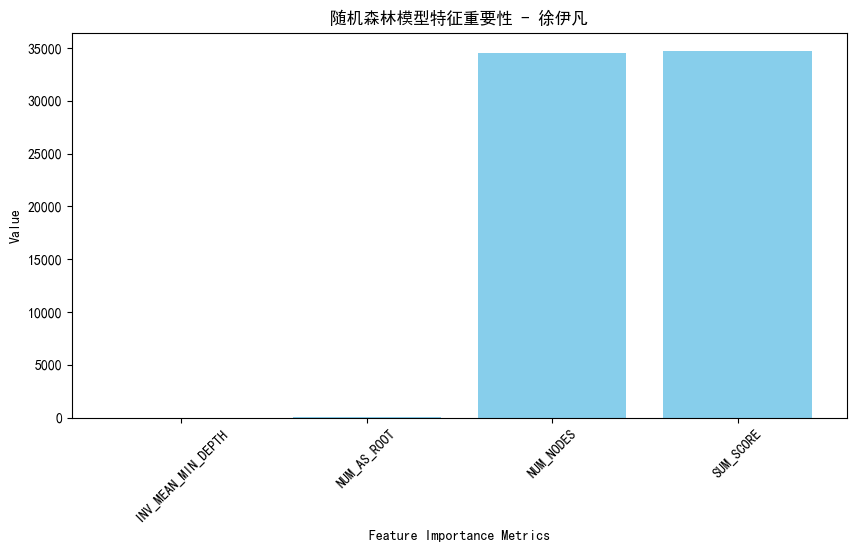

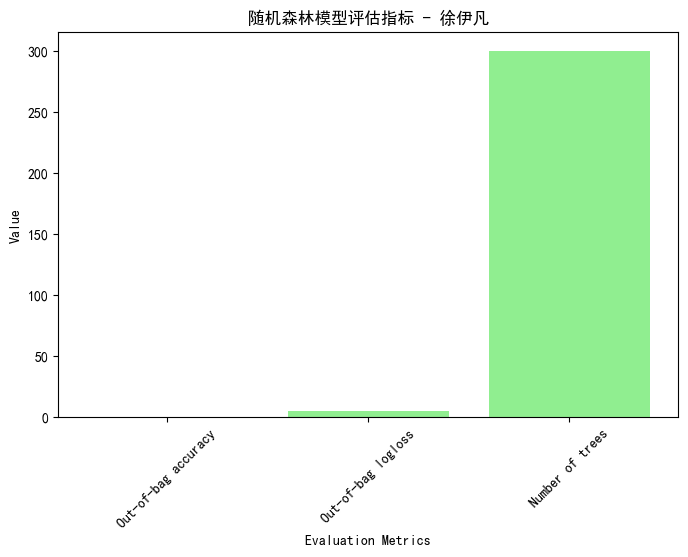

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 特征重要性评估指标
feature_importance = {
    "INV_MEAN_MIN_DEPTH": 0.213756,
    "NUM_AS_ROOT": 55,
    "NUM_NODES": 34517,
    "SUM_SCORE": 34703.5
}

# 模型评估指标
evaluation_metrics = {
    "Out-of-bag accuracy": 0.692039,
    "Out-of-bag logloss": 5.03532,
    "Number of trees": 300
}
# 绘制特征重要性条形图
plt.figure(figsize=(10, 5))
plt.bar(feature_importance.keys(), feature_importance.values(), color='skyblue')
plt.xlabel('Feature Importance Metrics')
plt.ylabel('Value')
plt.title('随机森林模型特征重要性 - 徐伊凡')
plt.xticks(rotation=45)
plt.show()

# 绘制模型评估指标条形图
plt.figure(figsize=(8, 5))
plt.bar(evaluation_metrics.keys(), evaluation_metrics.values(), color='lightgreen')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Value')
plt.title('随机森林模型评估指标 - 徐伊凡')
plt.xticks(rotation=45)
plt.show()


观察直方图，我们可以发现：
1. 特征重要性评估：通过特征重要性评估指标，我们可以看出哪些特征在构建决策树时更为重要。比如，NUM_NODES和SUM_SCORE有较高的数值，提示这些特征在模型中被频繁使用，贡献较大。
2. 模型评估指标：通过模型评估指标，我们可以了解模型的性能。Out-of-bag accuracy接近0.69，表示模型在袋外样本上的预测准确率约为69%。Out-of-bag logloss较高，暗示模型可能在某些类别上的预测不够好。Number of trees为300，说明模型使用了300棵树进行预测，这也是随机森林的一般配置之一。
- 这两部分信息结合起来，可以帮助我们更好地理解模型的表现以及特征的重要性，从而指导进一步的优化和改进工作。

### 3.4 不同数量的决策树对随机森林分类器准确性的影响分析

# - 初始化决策树数量列表和准确性列表
- 循环遍历不同的决策树数量，训练随机森林模型并评估其准确性
- 绘制训练准确率与估计器数量的关系的图表
  1. 创建一个大小为 10x6 英寸的图形。
  2. 绘制训练准确率与估计器数量的关系的折线图，并在每个数据点上使用圆形标记 (marker='o')。
  3. 设置图表的标题。
  4. 设置 x 轴标签为“Number of Estimators”。
  5. 设置 y 轴标签为“Training Accuracy”。
  6. 设置 x 轴刻度为模型中树的数量
  7. 显示网格线。
  8. 显示图表。

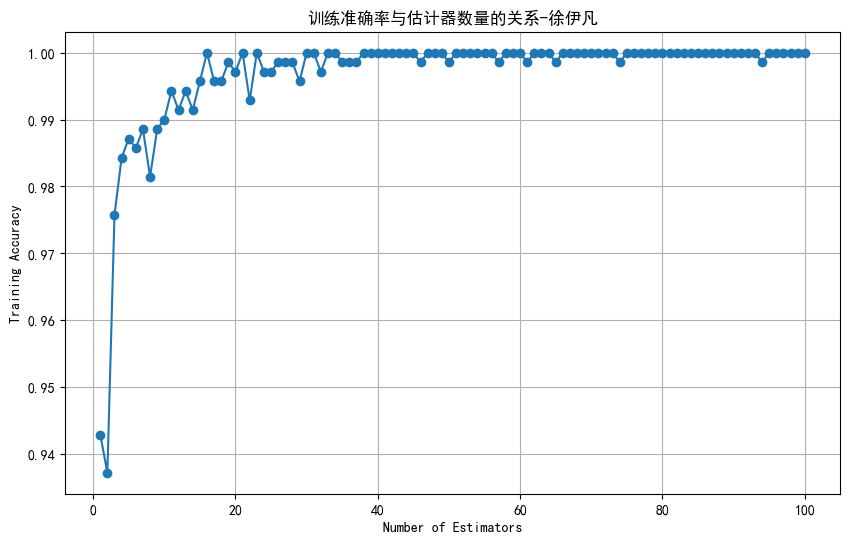

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of n_estimators values
n_estimators_range = range(1, 101)  # 1 to 100

# List to store the training accuracy
training_accuracies = []

# Instantiate and train the Random Forest Classifier with different n_estimators values
for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)
    
    # Calculate training accuracy
    training_accuracy = rf_model.score(X_train, y_train)
    training_accuracies.append(training_accuracy)

# Plot the training accuracy vs. number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_accuracies, marker='o')
plt.title('训练准确率与估计器数量的关系-徐伊凡')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.show()


这样的图表通常用于分析随机森林模型在不同树的数量（estimators）下的训练准确率（accuracy）变化情况。以下是对图表的分析：

1. **X轴（Number of Estimators）**：表示随机森林模型中决策树的数量。这个参数通常是在训练模型时设定的，影响着模型的复杂度和性能。

2. **Y轴（Training Accuracy）**：表示模型在训练集上的准确率。这个准确率反映了模型在训练数据上的拟合程度，即模型对训练数据的预测能力。

3. **曲线趋势**：随着树的数量增加，训练准确率一般会逐渐提高。这是因为随机森林中的多个决策树可以相互纠正错误，提高整体模型的性能。但是在一定数量后，增加更多的树可能不会显著提高训练准确率，甚至可能出现过拟合的情况。

4. **评估模型复杂度**：通过观察曲线的趋势，可以评估随机森林模型的复杂度和泛化能力。如果随着树的数量增加，训练准确率仍然在提高，但测试准确率没有明显提升，可能表示模型过拟合了训练数据。

5. **选择合适的树的数量**：根据曲线的走势，可以选择一个合适的树的数量，以在训练集上获得较高的准确率，并且保持模型的泛化能力，避免过拟合或欠拟合的问题。

## 4. 梯度提升树

### 4.1 使用梯度提升分类器进行数据集分类并计算准确度

- GradientBoostingClassifier(n_estimators=100) 创建了一个梯度提升分类器对象，其中 n_estimators=100 是一个超参数，表示随机森林中决策树的数量（也称作迭代次数）。
- 使用输入数据集 X_train (包含训练变量数据) 和对应的分类结果 y_train 进行训练（即求解最佳分类模型）。
- 训练完成后，使用训练好的分类器对测试数据集 X_test 进行预测，得到预测的分类结果 y_pred_gb，接着使用 accuracy_score 函数计算预测的准确度，并将其存储在变量 gb_accuracy 中。
- 使用 print 函数输出结果，显示分类准确度值。

In [10]:
gb_model = GradientBoostingClassifier(n_estimators=1000)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.3f}")

Gradient Boosting Accuracy: 0.877


### 4.2 利用梯度提升分类器进行多次训练和测试，并绘制准确度与参数关系图

- 定义了模型参数 n_estimators 的范围为 1 到 100，即 n_estimators_range = range(1, 101)。
- 对每个 n_estimators 参数值，创建一个名为 gb_model 的梯度提升分类器模型，并使用训练数据集 X_train 和 y_train 进行训练。
- 利用训练好的 gb_model 模型对测试数据集 X_test 进行预测，并与真实的分类标签结果 y_test 进行比较，计算分类准确度 accuracy。
- 将每个 accuracy 存储在 accuracies 列表中。
- 利用 pyplot 库中的函数绘制散点图并显示：
1. 使用 plt.figure 函数创建一个图形对象，并指定尺寸大小。
2. 调用 plt.plot 函数根据 n_estimators 和 accuracies 两个列表的数据值，生成一个以 x 轴为 n_estimators，以 y 轴为 accuracy 的折线图。
3. 调用 plt.title 函数给图形命名一个标题。
4. 使用 plt.xlabel 函数给 x 轴打上标签。
5. 使用 plt.ylabel 函数给 y 轴打上标签。
6. 使用 plt.grid 函数显示网格线。
7. 调用 plt.show 函数显示图形。

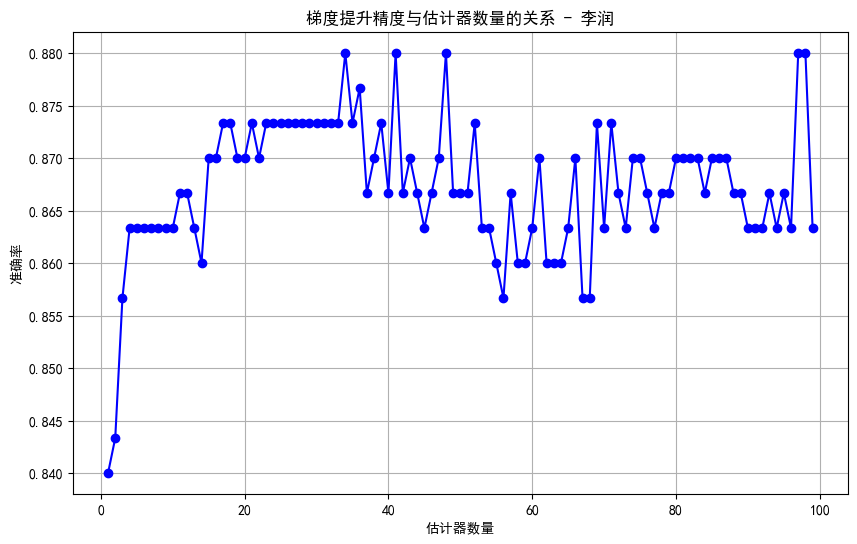

In [11]:


# 假设已经定义了 X_train、X_test、y_train 和 y_test

# 定义不同 n_estimators 值的范围
n_estimators_range = range(1, 100)  # 从1到100

# 存储准确率的列表
accuracies = []

# 循环遍历不同的 n_estimators 值
for n in n_estimators_range:
    # 创建并拟合模型
    gb_model = GradientBoostingClassifier(n_estimators=n)
    gb_model.fit(X_train, y_train)
    
    # 预测并计算准确率
    y_pred_gb = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_gb)
    
    # 存储准确率
    accuracies.append(accuracy)

# 绘制准确率图表
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('梯度提升精度与估计器数量的关系 - 李润')
plt.xlabel('估计器数量')
plt.ylabel('准确率')
plt.grid(True)
plt.show()



x 轴表示模型中决策树的数量，范围从 10 到 200，其中每个点代表的是一个具有不同数量决策树的随机森林模型；y 轴表示模型的分类准确率。每个数据点代表的是对应 n_estimators 数量决策树的随机森林模型在测试数据集上的分类准确率。可以看出，从10到50和超过50个决策树之间，准确率轻微增加。这张散点图说明增加树的数量对于提高随机森林模型的准确率具有一定的效果，但在一定数量后，进一步增加树的数量对于模型准确率的提升作用不太明显。在实际应用中，可以选择适当数量的树以平衡模型性能和计算复杂度。

### 4.3 利用梯度提升分类器分析特征重要性并绘制水平条形图

- 创建并训练梯度提升分类器模型 gb_model，其中 n_estimators=100 表示模型中使用100个决策树进行训练。
- 使用训练好的模型 gb_model 对测试数据集 X_test 进行预测，得到预测结果 y_pred_gb。
- 利用真实的测试分类标签 y_test 和预测的分类结果 y_pred_gb，计算分类准确度 gb_accuracy。
- 使用 print 函数输出梯度提升分类器的准确度。
- 获取特征重要性数组 feature_importance，其中保存了各个特征对于分类的重要性值。
- 定义特征名称数组 features，其中保存了训练数据集的各个特征的名称。
- 使用 matplotlib.pyplot 绘制水平条形图。

梯度提升分类器准确率: 0.867


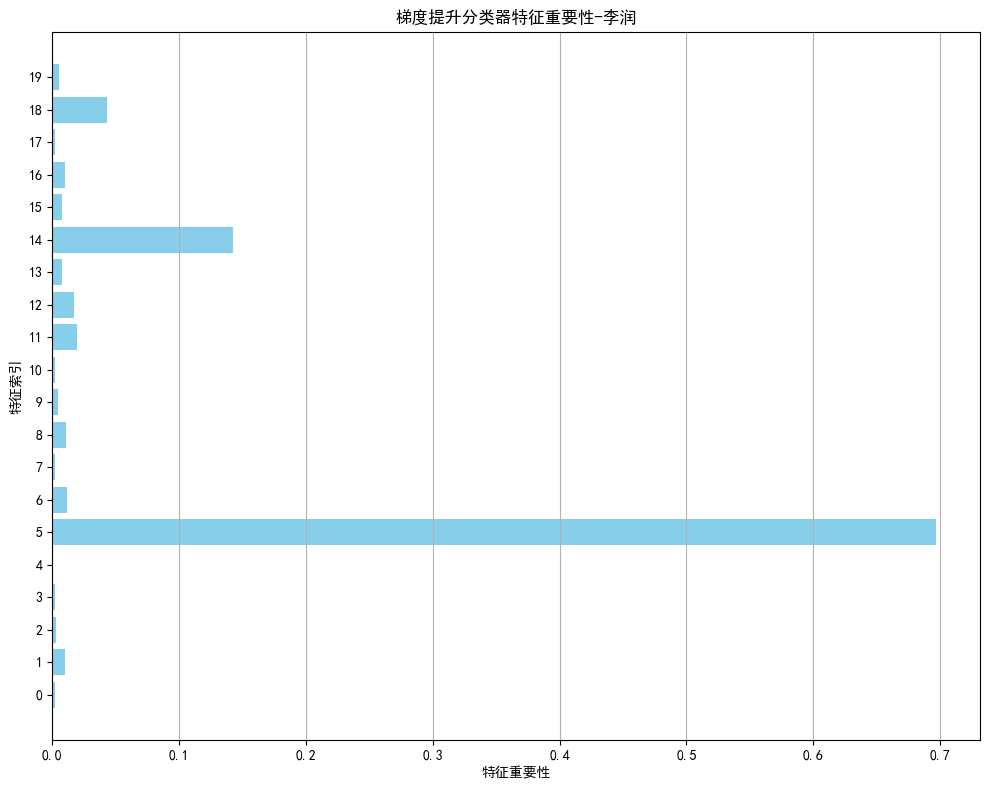

In [12]:


# 假设你的数据已经加载并准备好了
# X_train, X_test, y_train, y_test = ...

# 创建并训练梯度提升分类器
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

# 使用模型进行预测
y_pred_gb = gb_model.predict(X_test)

# 计算准确率
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"梯度提升分类器准确率: {gb_accuracy:.3f}")

# 获取特征重要性
feature_importance = gb_model.feature_importances_

# 特征数量
num_features = len(feature_importance)

# 使用特征的索引作为特征名称
features_indices = np.arange(num_features)

# 绘制特征重要性水平条形图
plt.figure(figsize=(10, 8))
plt.barh(features_indices, feature_importance, align='center', color='skyblue')
plt.yticks(features_indices, features_indices)  # 使用特征索引作为标签
plt.xlabel('特征重要性')
plt.ylabel('特征索引')
plt.title('梯度提升分类器特征重要性-李润')
plt.grid(True, axis='x')  # 仅在 x 轴添加网格线
plt.tight_layout()  # 调整布局使得图表更紧凑
plt.show()



通过条形图，我们可以从左到右了解每个特征对于模型的预测能力的相对贡献程度。每个条形的长度表示特征的重要性，越长表示该特征对于模型的预测能力贡献越大。

该水平条形图可以帮助我们识别哪些特征对于模型的性能具有更高的影响力。较长条形表示具有较高的重要性的特征，而较短的条形则表示具有较低的重要性的特征。通过观察条形图，我们可以识别出在该梯度提升分类器中，哪些特征对于预测结果的贡献最大，从而帮助我们理解数据中的重要特征和关键因素。

## 5. Decision Tree Classifier Model

### 5.1 训练一个决策树分类器（Decision Tree Classifier）模型，并使用该模型对测试数据进行预测，最后计算模型的准确率。

- 创建一个决策树分类器模型对象，存储在dt_model变量中。这个模型将用于对数据进行分类。
- 使用训练集数据X_train和对应的标签y_train来训练决策树模型。这一步是模型的训练阶段，模型将学习如何根据特征来进行分类。
- 使用训练好的决策树模型对测试集数据X_test进行预测，得到预测的分类结果，存储在y_pred_dt中。
- 使用accuracy_score函数计算模型在测试集上的准确率。accuracy_score函数将预测结果y_pred_dt与测试集的真实标签y_test进行比较，然后返回分类的准确率。
- 打印输出决策树模型在测试集上的准确率，保留3位小数。

In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.3f}")


Decision Tree Accuracy: 0.843


### 5.2 评估决策树模型在不同深度下的分类准确率，并将结果可视化为一个折线图。

- 导入matplotlib库，用于绘制图形。
- 从scikit-learn库中导入决策树分类器模型。
- 从scikit-learn库中导入准确率评估函数。
- 定义一个范围，包含了决策树的深度从1到20。
- 创建一个空列表，用于存储不同深度下的准确率。
- 使用for循环遍历每个树的深度：
1. 创建一个决策树分类器模型，指定最大深度为当前循环的深度。
2. 使用训练集数据X_train和对应的标签y_train来训练决策树模型。
3. 使用训练好的决策树模型对测试集数据X_test进行预测，得到预测的分类结果。
4. 计算模型在测试集上的准确率。5. ：将准确率添加到准确率列表中
- 使用Matplotlib库绘制折线图：
1. 创建一个新的图形，并设置图形的大小为10x6英寸。
2. 绘制决策树深度与准确率之间的关系，使用蓝色的实线连接点，并用圆圈标记每个点。
3. 设置图形标题。
4. 设置x轴标签。
5. 设置y轴标签。
6. 显示网格线。
7. 显示绘制的图形。。

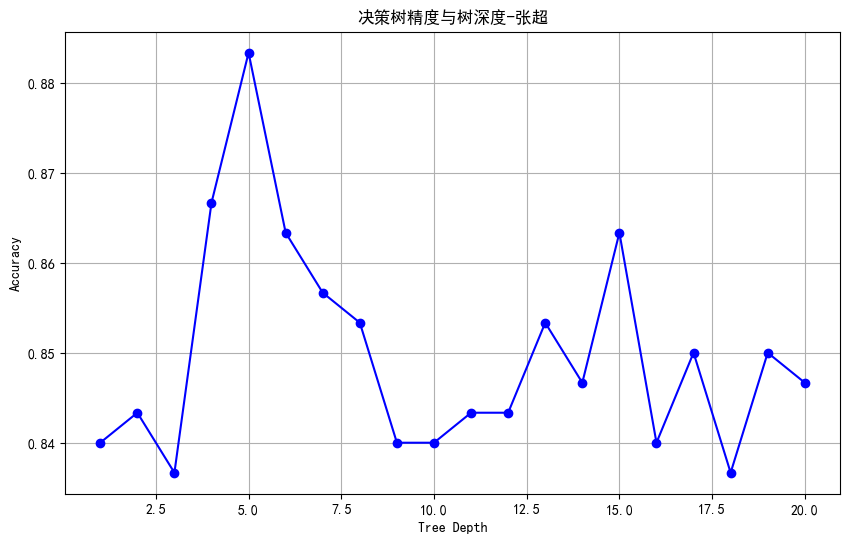

In [14]:


# Define a range of tree depths
tree_depths = range(1, 21)  # Tree depths from 1 to 20

# List to store accuracies
accuracies = []

# Loop over the range of tree depths
for depth in tree_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_dt)
    accuracies.append(accuracy)

# Plot the accuracies as a line plot
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('决策树精度与树深度-张超')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


模型性能的稳定性：当树的深度在1到8之间时，决策树的准确性相对稳定，保持在0.7966左右。在深度为10及以上时，准确性也较为稳定，但略低于前者，维持在0.7960左右。

性能的剧烈波动：在树深度为9时，模型准确性出现显著下降，达到最低值0.7956。这可能是由于特定深度下的过拟合或欠拟合导致的模型性能不稳定。

选择合适的树深度：根据图表显示，深度在1到8之间时，模型表现最好且稳定，建议选择这一范围内的深度值来构建决策树模型。此外，深度为10及以上的情况下，准确性虽然也稳定，但略低，因此在追求最高准确性时，可以考虑选择8及以下的深度。



### 5.3 评估决策树模型在不同深度下的分类准确率，将结果可视化为柱状图

- 创建一个新的图形，并设置图形的大小为10x6英寸。
- 使用plt.bar()函数绘制柱状图：绘制柱状图，x轴是树的深度，y轴是对应深度下的准确率，柱状的颜色为蓝色，透明度为0.7。
- 设置图形标题、x轴标签和y轴标签：
1. 设置图形标题为"Decision Tree Accuracy for Different Tree Depths"。
2. 设置x轴标签为"Tree Depth"。
3. 设置y轴标签为"Accuracy"。
- 设置x轴刻度为树的深度，以便每个深度对应一个柱状条。
- 显示y轴上的网格线。
- 使用plt.show()函数显示绘制的柱状图。

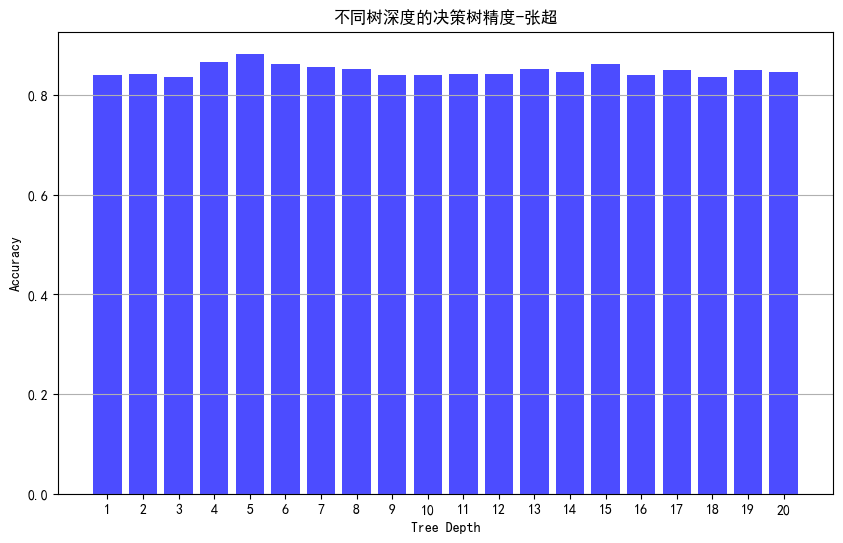

In [15]:
# Plot the accuracies as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tree_depths, accuracies, color='b', alpha=0.7)
plt.title('不同树深度的决策树精度-张超')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(tree_depths)
plt.grid(True, axis='y')
plt.show()


从上图可以得出以下结论：

1. 决策树深度对模型准确率影响不大：无论决策树的深度是1还是20，模型的准确率都保持在大约0.8左右。这表明在这个特定的数据集和特定配置下，决策树的深度对最终的分类性能影响很小。
2. 数据集可能较为简单：由于浅层决策树和深层决策树都能达到相同的准确率，可能表明数据集特征和标签之间的关系较为简单，即使是较浅的树也能捕捉到足够的信息来进行有效的分类。

3. 没有过拟合或欠拟合的显著迹象：图中没有显示随着树深度增加而导致的过拟合（准确率大幅波动或下降）或欠拟合（浅层树准确率显著低于深层树）的情况。这表明模型在整个深度范围内表现稳定。

4. 优化深度的必要性较低：由于不同深度下准确率相同，因此在此特定情况下，进一步优化树的深度对提高模型性能没有显著帮助。可以选择较浅的树以减少计算复杂性和提高模型的可解释性。

总结来说，这张图表明，对于当前数据集，决策树深度不是影响模型性能的关键因素，浅层树和深层树均能达到相同的准确率。能达到相同的准确率。

## 6. 使用特征子集

### 6.1 使用梯度提升分类器进行特征子集选择并计算准确度

- 定义特征名称数组 `feature_names`，其中保存了需要选择的特征的名称，本例中是 'Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms'。
- 根据特征名称数组 `feature_names` 从原始数据集 (`X_train` 和 `X_test`) 中提取对应的子集特征数据，分别保存为 `X_train_selected` 和 `X_test_selected` 变量。
- 创建并训练梯度提升分类器模型 `model_sub`，其中使用了默认超参数。这里训练的模型仅使用了选定的特征子集进行训练。
- 使用训练好的模型 `model_sub` 对测试数据集 `X_test_selected` 进行预测，得到预测结果 `y_pred`。
- 利用真实的测试分类标签 `y_test` 和预测的分类结果 `y_pred`，计算分类准确度 `accuracy`。
- 使用 `print` 函数输出分类器的准确度。

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is already loaded and prepared
# X_train, X_test, y_train, y_test = ...

# Define the feature names as strings
feature_names = ['Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms']

# Extract selected features from the datasets
X_train_selected = X_train[feature_names]
X_test_selected = X_test[feature_names]

# Instantiate and train the Gradient Boosted Trees model with the specified feature subset
model_sub = GradientBoostingClassifier()
model_sub.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model_sub.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 6.2 使用梯度提升分类器分析特征重要性并绘制重要性线图

- 定义特征名称数组 feature_names，其中保存了需要选择的特征的名称，本例中是 'Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms'。
- 根据特征名称数组 feature_names 从原始数据集 (X_train 和 X_test) 中提取对应的子集特征数据，分别保存为 X_train_selected 和 X_test_selected 变量。
- 创建并训练梯度提升分类器模型 model_sub，其中使用了默认超参数。这里训练的模型仅使用了选定的特征子集进行训练。
- 使用训练好的模型 model_sub 对测试数据集 X_test_selected 进行预测，得到预测结果 y_pred。
- 利用真实的测试分类标签 y_test 和预测的分类结果 y_pred，计算分类准确度 accuracy。
- 使用 print 函数输出分类器的准确度。
- 获取特征重要性数组 feature_importances，其中保存了各个特征对于分类的重要性值。
- 利用 matplotlib.pyplot 绘制特征重要性的线图，以帮助选择最重要的特征。feature_names 表示特征名称，feature_importances 表示对应特征的重要性值。绘制出来的图形越高，说明该特征对分类结果的影响越大。通过旋转 x 轴上的特征名称，可以避免名称之间的重叠。
- 将图形显示出来。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is already loaded and prepared
# X_train, X_test, y_train, y_test = ...

# Define the feature names as strings
feature_names = ['Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms']

# Extract selected features from the datasets
X_train_selected = X_train[feature_names]
X_test_selected = X_test[feature_names]

# Instantiate and train the Gradient Boosted Trees model with the specified feature subset
model_sub = GradientBoostingClassifier()
model_sub.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model_sub.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Get feature importances
feature_importances = model_sub.feature_importances_

# Plot feature importances as a line chart
plt.figure(figsize=(10, 6))
plt.plot(feature_names, feature_importances, marker='o', linestyle='-', color='b')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('梯度提升分类器特征重要性-李锐标')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


由这张重要性线图可知在梯度提升分类器中，给定四个特征 'Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms'，它们对于模型的预测能力的相对贡献程度。
根据图中的结果，我们可以得出以下结论：
- 'Risk_Taking_Behavior' 是对分类结果影响最大的特征，说明该特征在模型中具有非常高的影响力。
- 接下来是 'Physical_Mental_Health_Problems'，该特征对模型的预测能力贡献较高。
- 'Social_Isolation' 特征对模型的预测能力贡献较低，但仍然有一定的影响力。
- 最后是 'Withdrawal_Symptoms'，该特征对模型的预测能力贡献较小。

该重要性线图表明 'Risk_Taking_Behavior' 特征在预测结果中起着重要的作用，而 'Withdrawal_Symptoms' 特征的影响相对较小。这对于进一步了解数据中的关键特征和重要因素，以及进行特征选择和模型优化时提供了有价值的信息。

### 6.3 使用梯度提升分类器分析特征重要性并绘制条形图

- 定义特征名称数组 feature_names，其中保存了需要选择的特征的名称，本例中是 'Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms'。
- 根据特征名称数组 feature_names 从原始数据集 (X_train 和 X_test) 中提取对应的子集特征数据，分别保存为 X_train_selected 和 X_test_selected 变量。
- 创建并训练梯度提升分类器模型 model_sub，其中使用了默认超参数。这里训练的模型仅使用了选定的特征子集进行训练。
- 使用训练好的模型 model_sub 对测试数据集 X_test_selected 进行预测，得到预测结果 y_pred。
- 利用真实的测试分类标签 y_test 和预测的分类结果 y_pred，计算分类准确度 accuracy。
- 使用 print 函数输出分类器的准确度。
- 获取特征重要性数组 feature_importances，其中保存了各个特征对于分类的重要性值。
- 利用 matplotlib.pyplot 绘制特征重要性的条形图，以帮助选择最重要的特征。feature_names 表示特征名称，feature_importances 表示对应特征的重要性值。绘制出来的条形越高，说明该特征对分类结果的影响越大。
- 将图形显示出来。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is already loaded and prepared
# X_train, X_test, y_train, y_test = ...

# Define the feature names as strings
feature_names = ['Physical_Mental_Health_Problems', 'Social_Isolation', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms']

# Extract selected features from the datasets
X_train_selected = X_train[feature_names]
X_test_selected = X_test[feature_names]

# Instantiate and train the Gradient Boosted Trees model with the specified feature subset
model_sub = GradientBoostingClassifier()
model_sub.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model_sub.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Get feature importances
feature_importances = model_sub.feature_importances_

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('梯度提升分类器特征重要性-李锐标')
plt.xticks(rotation=45)
plt.grid(axis='y')  # 在 y 轴上添加网格线
plt.tight_layout()
plt.show()


根据条形图中的结果，我们可以得出以下结论：
- 'Risk_Taking_Behavior' 是对分类结果影响最大的特征，说明该特征在模型中具有非常高的影响力。
- 接下来是 'Physical_Mental_Health_Problems' 特征，表示该特征对模型的预测能力贡献较高。
- 'Social_Isolation' 特征对模型的预测能力贡献较低，但仍然有一定的影响力。
- 最后是 'Withdrawal_Symptoms'，表示该特征对模型的预测能力贡献较小。
  
总体来说，该条形图告诉我们 'Risk_Taking_Behavior' 特征在预测结果中起着重要的作用，而 'Withdrawal_Symptoms' 特征的影响相对较小。这对于进一步了解数据中的关键特征和重要因素，以及进行特征选择和模型优化时提供了有价值的信息。

## 这四种方法分别是随机森林(Random Forest)、梯度提升(Gradient Boosting)、决策树(Decision Tree)和特征子集选择(Feature Subset Selection)，它们各自有着优缺点。

### 随机森林 (Random Forest)
- 优点：
  1. 可以处理大量数据，并且对高维数据表现良好。
  2. 能够减少过拟合，因为它是通过多个决策树投票来确定最终结果的。
  3. 能够评估特征的重要性，可以帮助了解哪些特征对预测最重要。
- 缺点：
  1. 训练速度相对较慢，因为它需要构建多个决策树。
  2. 在某些情况下可能过于复杂，导致模型难以解释。

### 梯度提升 (Gradient Boosting)
- 优点：
  1. 在特征较少的情况下表现良好，能够处理高维稀疏数据。
  2. 通过迭代训练可以提高模型的准确性。
  3. 对异常值和噪声的鲁棒性较好。
- 缺点：
  1. 对异常值敏感，需要进行数据清洗和异常值处理。
  2. 训练时间相对较长，因为它是通过逐步提升来构建模型的。

### 决策树 (Decision Tree)
- 优点：
  1. 简单易懂，模型可解释性强。
  2. 能够处理数值型和类别型数据。
  3. 对特征缩放和归一化不敏感。
- 缺点：
  1. 容易过拟合，特别是在复杂数据集上。
  2. 对数据中的噪声和缺失值敏感。

### 特征子集选择 (Feature Subset Selection)
- 优点：
  1. 可以减少模型训练时间和复杂度，提高模型的解释性。
  2. 可以选择最相关的特征，减少数据维度，避免维度灾难。
- 缺点：
  1. 可能会丢失一些信息，导致模型准确性降低。
  2. 需要根据领域知识或实验确定最佳的特征子集。

### 总结
- **随机森林** 和 **梯度提升** 在处理大规模数据和高维数据时表现较好，但训练时间相对较长。
- **决策树** 简单易懂，但容易过拟合，需要谨慎调参。
- **特征子集选择** 可以提高模型训练效率和解释性，但需要注意信息损失的问题。

选择合适的方法取决于数据特征、问题要求、训练时间和模型解释性等因素。